In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target.copy()

X = X[y<2, :2]
y = y[y<2]

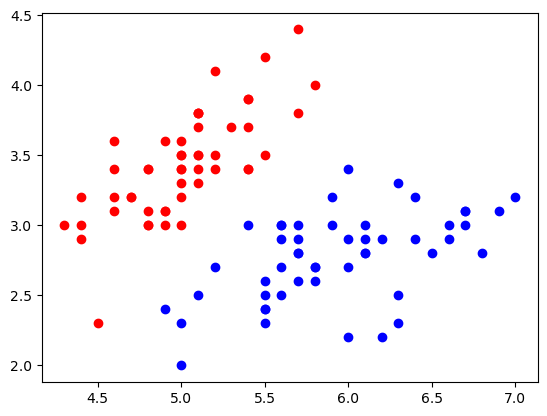

In [4]:
plt.scatter(X[y==0,0], X[y==0,1], color='r')
plt.scatter(X[y==1,0], X[y==1,1], color='b')

In [5]:
# 由于 SVM 衡量的是样本间距离，因此需要数据标准化操作
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
stdScaler.fit(X)
X_std = stdScaler.transform(X)

### C 越大，模型越趋于 hard SVM

In [6]:
# 导入SVC，利用SVM思想解决分类工作
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(X_std, y)

LinearSVC(C=1000000000.0)

In [7]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\Users\14927\AppData\Local\Temp\ipykernel_584\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


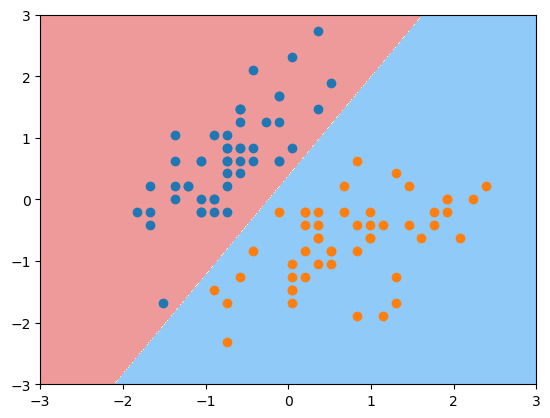

In [9]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])
plt.show()

### C 越小，模型越趋于 Soft SVM

In [22]:
svc_sf = LinearSVC(C=1e-1)
svc_sf.fit(X_std, y)

LinearSVC(C=0.1)

C:\Users\14927\AppData\Local\Temp\ipykernel_584\2833637709.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


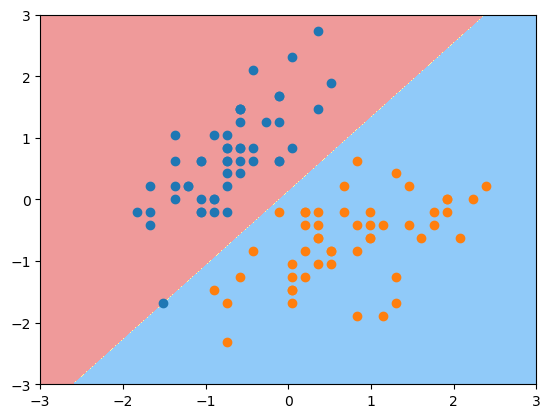

In [23]:
plot_decision_boundary(svc_sf, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])

In [19]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
  
    # 这里我们绘制出两个样本集对应的决策边界（落在上面的点即为支撑向量）
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

C:\Users\14927\AppData\Local\Temp\ipykernel_584\1160830498.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


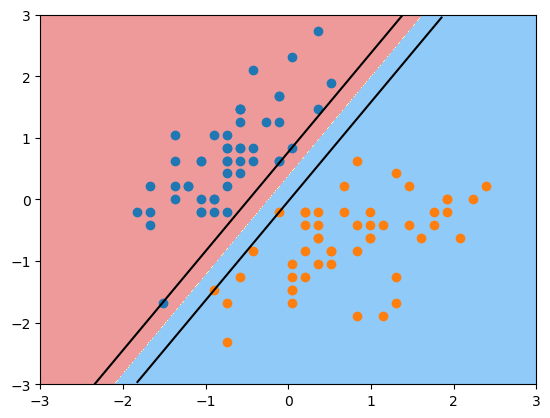

In [21]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_std[y==0,0], X_std[y==0,1])
plt.scatter(X_std[y==1,0], X_std[y==1,1])

# 观察可知，三个点作为上方样本的支撑向量；